In [ ]:
import model_functions as func

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN, SpectralClustering, AgglomerativeClustering

In [2]:
# unpacking train data
data = pd.read_csv('pitchfork_data.csv')

In [3]:
# removing tracks and artists with mp3 scraping complications (found by spot-checking)
data = data.loc[data.Track != 'Nativity']
data = data.loc[data.Track != 'Solilunita']
data = data.loc[data.Artist != 'EMA']
data = data.loc[data.Track != 'Near To The Wild Heart Of Life']
data = data.loc[data.Track != 'The Muppet Show Theme']
data = data.loc[data.Track != 'Born This Way']
data = data.loc[data.Track != 'Shallow']
data = data.loc[data.Artist != 'Lady Gaga']

In [4]:
# Dropping nulls
data = data.dropna().reset_index()

In [5]:
# Removing unnecessary columns
data = data.drop(columns=['index','Analysis_URL','Duration_ms','Genres','Key','Time_Sig','mfcc1','mfcc1_var','tempo','Popularity', \
                          'mfcc14','mfcc14_var','mfcc15','mfcc15_var','mfcc16','mfcc16_var','mfcc17', 'Tempo_Spot',\
                          'mfcc17_var','mfcc18','mfcc18_var','mfcc19','mfcc19_var','mfcc20','mfcc20_var'])

In [6]:
data

Artist  \
0                      Ratking   
1                      Ratking   
2                      Ratking   
3                      Ratking   
4                      Ratking   
5                      Ratking   
6                      Ratking   
7                      Ratking   
8                      Ratking   
9                      Ratking   
10                      Wu Lyf   
11                      Wu Lyf   
12                      Wu Lyf   
13                      Wu Lyf   
14                      Wu Lyf   
15                      Wu Lyf   
16                      Wu Lyf   
17                      Wu Lyf   
18                      Wu Lyf   
19                      Wu Lyf   
20            Fatima Al Qadiri   
21            Fatima Al Qadiri   
22            Fatima Al Qadiri   
23            Fatima Al Qadiri   
24            Fatima Al Qadiri   
25            Fatima Al Qadiri   
26            Fatima Al Qadiri   
27            Fatima Al Qadiri   
28            Fatima Al Qadiri   
29            Fatima Al Qadiri   
30                      Portal   
31                      Portal   
32                      Portal   
33                      Portal   
34                      Portal   
35                      Portal   
36                      Portal   
37                      Portal   
38                      Portal   
39                      Portal   
40               Downtown Boys   
41               Downtown Boys   
42               Downtown Boys   
43               Downtown Boys   
44               Downtown Boys   
45               Downtown Boys   
46               Downtown Boys   
47               Downtown Boys   
48               Downtown Boys   
49               Downtown Boys   
50            Titus Andronicus   
51            Titus Andronicus   
52            Titus Andronicus   
53            Titus Andronicus   
54            Titus Andronicus   
55            Titus Andronicus   
56            Titus Andronicus   
57            Titus Andronicus   
58            Titus Andronicus   
59            Titus Andronicus   
60                    Lil Peep   
61                    Lil Peep   
62                    Lil Peep   
63                    Lil Peep   
64                    Lil Peep   
65                    Lil Peep   
66                    Lil Peep   
67                    Lil Peep   
68                    Lil Peep   
69                    Lil Peep   
70                      Kelela   
71                      Kelela   
72                      Kelela   
73                      Kelela   
74                      Kelela   
75                      Kelela   
76                      Kelela   
77                      Kelela   
78                      Kelela   
79                      Kelela   
80                   Kate Bush   
81                   Kate Bush   
82                   Kate Bush   
83                   Kate Bush   
84                   Kate Bush   
85                   Kate Bush   
86                   Kate Bush   
87                   Kate Bush   
88                   Kate Bush   
89                   Kate Bush   
90                   Huerco S.   
91                   Huerco S.   
92                   Huerco S.   
93                   Huerco S.   
94                   Huerco S.   
95                   Huerco S.   
96                   Huerco S.   
97                   Huerco S.   
98                   Huerco S.   
99                   Huerco S.   
100            Miranda Lambert   
101            Miranda Lambert   
102            Miranda Lambert   
103            Miranda Lambert   
104            Miranda Lambert   
105            Miranda Lambert   
106            Miranda Lambert   
107            Miranda Lambert   
108            Miranda Lambert   
109            Miranda Lambert   
110                    Pusha-T   
111                    Pusha-T   
112                    Pusha-T   
113                    Pusha-T   
114                    Pusha-T   
115                    Pusha-T   
116                    Pusha-T   
117         

In [8]:
# Splitting data by feature type

spotify = func.center_scale(data.iloc[:, 2:11].copy())
lib_other = func.center_scale(data.iloc[:, 11:16].copy())
lib_other_spec = func.center_scale(data.iloc[:, 13:16])
zcr = func.center_scale(np.array(data.iloc[:, 11]).reshape(-1,1))
mfccs = func.center_scale(data.iloc[:, 16:40].copy())
mfcc_means = func.center_scale(data.loc[:,['mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13']])
mfcc_vars = func.center_scale(data.loc[:,['mfcc2_var','mfcc3_var','mfcc4_var','mfcc5_var','mfcc6_var','mfcc7_var','mfcc8_var','mfcc9_var','mfcc10_var','mfcc11_var','mfcc12_var','mfcc13_var']])

spec_cont = center_scale(data.iloc[:, 40:47].copy())
chroma = center_scale(data.iloc[:, 47:59].copy())
tonnetz = center_scale(data.iloc[:, 59:].copy())
all_feat = center_scale(data.iloc[:, 2:].copy())

**Testing PCA Dimensionality Reduction**

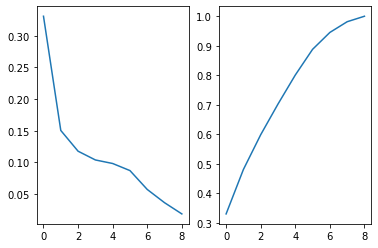

In [10]:
func.choose_PCA_elements(spotify)

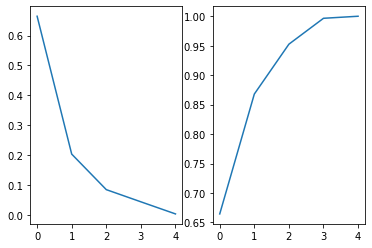

In [11]:
func.choose_PCA_elements(lib_other)

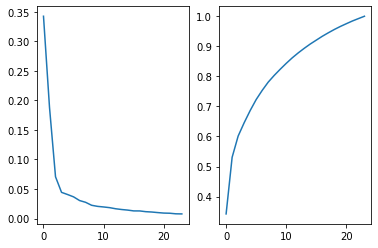

In [12]:
func.choose_PCA_elements(mfccs)

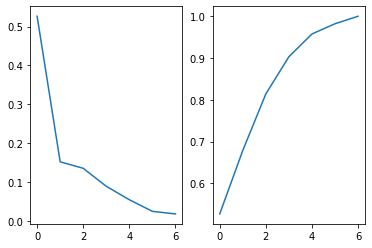

In [13]:
func.choose_PCA_elements(spec_cont)

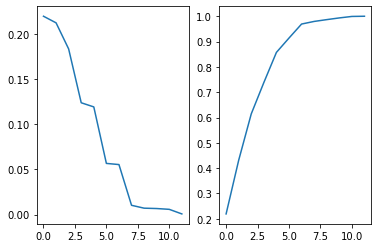

In [14]:
func.choose_PCA_elements(chroma)

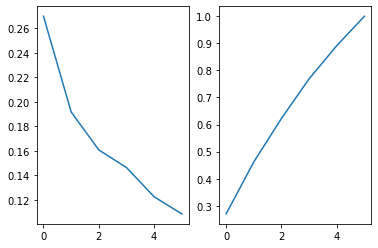

In [15]:
func.choose_PCA_elements(tonnetz)

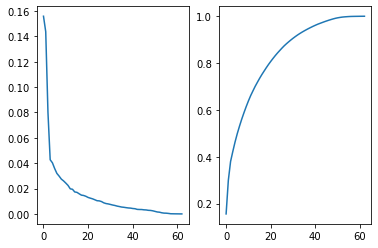

In [16]:
func.choose_PCA_elements(all_feat)

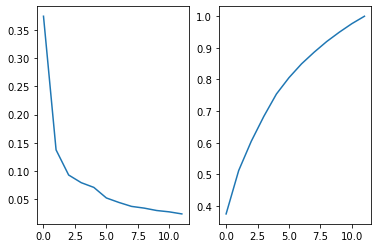

In [17]:
func.choose_PCA_elements(mfcc_means)

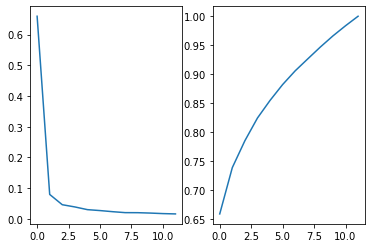

In [18]:
func.choose_PCA_elements(mfcc_vars)

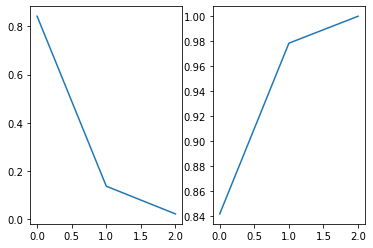

In [19]:
func.choose_PCA_elements(lib_other_spec)

**Creating PCA Feature Matrices**

In [95]:
pca_spotify = PCA(n_components=3, random_state=10)
pca_spotify.fit(spotify)
pcafeat_spotify = pca_spotify.transform(spotify)

In [96]:
pca_spotify.explained_variance_

array([2.97964873, 1.35459108, 1.05930046])

In [129]:
# Pickling!
pickle_out = open("pca_spotify_3.pickle","wb")
pickle.dump(pca_spotify, pickle_out)
pickle_out.close()

In [130]:
Spotify_Components = pd.DataFrame(pca_spotify.components_.transpose(), columns = ['Spotify_PCA1','Spotify_PCA2','Spotify_PCA3'])
Spotify_Components.to_csv('Spotify3_Components.csv', index=False)

In [22]:
pca_lib_other = PCA(n_components=1, random_state=10)
pca_lib_other.fit(lib_other)
pcafeat_lib_other = pca_lib_other.transform(lib_other)

In [66]:
pca_mfcc = PCA(n_components=2, random_state=10)
pca_mfcc.fit(mfccs)
pcafeat_mfcc = pca_mfcc.transform(mfccs)

In [126]:
pca_mfcc.explained_variance_

array([8.22408469, 4.52075549])

In [127]:
# Pickling!
pickle_out = open("pca_mfcc_2.pickle","wb")
pickle.dump(pca_mfcc, pickle_out)
pickle_out.close()

In [128]:
MFCC_Components = pd.DataFrame(pca_mfcc.components_.transpose(), columns = ['MFCC_PCA1','MFCC_PCA2'])
MFCC_Components.to_csv('MFCC_Components.csv', index=False)

In [25]:
pca_spec_cont = PCA(n_components=1, random_state=10)
pca_spec_cont.fit(spec_cont)
pcafeat_spec_cont = pca_spec_cont.transform(spec_cont)

In [26]:
pca_chroma = PCA(n_components=7, random_state=10)
pca_chroma.fit(chroma)
pcafeat_chroma = pca_chroma.transform(chroma)

In [27]:
pca_tonnetz = PCA(n_components=4, random_state=10)
pca_tonnetz.fit(tonnetz)
pcafeat_tonnetz = pca_tonnetz.transform(tonnetz)

In [28]:
pca_all_feat = PCA(n_components=5, random_state=10)
pca_all_feat.fit(all_feat)
pcafeat_all_feat = pca_all_feat.transform(all_feat)

In [29]:
pca_mfcc_means = PCA(n_components=3, random_state=10)
pca_mfcc_means.fit(mfccs)
pcafeat_mfcc_means = pca_mfcc_means.transform(mfccs)

In [30]:
pca_mfcc_vars = PCA(n_components=2, random_state=10)
pca_mfcc_vars.fit(mfccs)
pcafeat_mfcc_vars = pca_mfcc_vars.transform(mfccs)

In [31]:
pca_lib_other_spec = PCA(n_components=2, random_state=10)
pca_lib_other_spec.fit(mfccs)
pcafeat_lib_other_spec = pca_lib_other_spec.transform(mfccs)

**Clustering**

In [100]:
X = np.concatenate([pcafeat_mfcc], axis=1)
X.shape

(1773, 2)

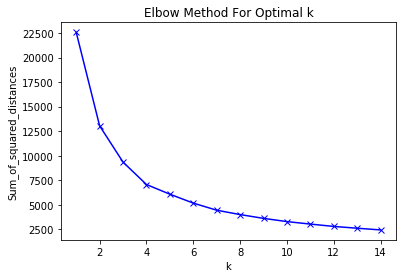

In [101]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [112]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=50)
km.fit(X)
km.inertia_

7059.490207539739

In [125]:
# Pickling!
pickle_out = open("km_mfccs.pickle","wb")
pickle.dump(km, pickle_out)
pickle_out.close()

In [114]:
km.cluster_centers_

array([[ 1.10783363, -1.5772807 ],
       [-0.21770209,  2.84893152],
       [ 5.12882515,  0.44495323],
       [-2.48829545, -0.46246882]])

In [115]:
pca_mfcc.components_

array([[-0.07439667,  0.21798151,  0.06577234,  0.23400682, -0.12122476,
         0.27394813, -0.01120563,  0.28917393, -0.1040638 ,  0.30277872,
        -0.02693231,  0.30385028, -0.07966252,  0.30016373, -0.04560777,
         0.29812226, -0.01084279,  0.29764595, -0.02656125,  0.29395807,
        -0.01383002,  0.27981569,  0.01323672,  0.27735741],
       [ 0.16689493, -0.04332683, -0.13266725, -0.09534222, -0.16243189,
        -0.07805175, -0.22234503, -0.06277625, -0.2972623 , -0.03965822,
        -0.26999367, -0.04006566, -0.35347583, -0.01033733, -0.30642655,
        -0.0229493 , -0.35605626,  0.00613904, -0.34267337, -0.01043222,
        -0.35252183,  0.02105515, -0.32296316,  0.02098981]])

In [116]:
pca_mfcc.explained_variance_

array([8.22408469, 4.52075549])

In [117]:
km_results = data.iloc[:,0:2].copy()
km_results['km_cluster'] = km.labels_
km_results.shape
#pd.concat([km_results.iloc[:,:2],km_results.iloc[:,-1],], axis=1)#

(1773, 3)

In [118]:
km_results.loc[km_results.km_cluster == 0]

Artist  \
0                   Ratking   
3                   Ratking   
5                   Ratking   
6                   Ratking   
7                   Ratking   
63                 Lil Peep   
64                 Lil Peep   
65                 Lil Peep   
66                 Lil Peep   
69                 Lil Peep   
72                   Kelela   
76                   Kelela   
77                   Kelela   
78                   Kelela   
87                Kate Bush   
101         Miranda Lambert   
110                 Pusha-T   
113                 Pusha-T   
114                 Pusha-T   
115                 Pusha-T   
116                 Pusha-T   
118                 Pusha-T   
119                 Pusha-T   
135            Hailu Mergia   
138            Hailu Mergia   
162            Jamila Woods   
163            Jamila Woods   
164            Jamila Woods   
167            Jamila Woods   
169                Chvrches   
171                Chvrches   
175                Chvrches   
181         Shabazz Palaces   
182         Shabazz Palaces   
183         Shabazz Palaces   
184         Shabazz Palaces   
186         Shabazz Palaces   
187         Shabazz Palaces   
188         Shabazz Palaces   
189                 Savages   
195                 Savages   
201             Margo Price   
202             Margo Price   
205             Margo Price   
211         Gil Scott-Heron   
214         Gil Scott-Heron   
215         Gil Scott-Heron   
216         Gil Scott-Heron   
217         Gil Scott-Heron   
219             Jessie Ware   
221             Jessie Ware   
227             Jessie Ware   
228             Jessie Ware   
230        Sharon Van Etten   
231        Sharon Van Etten   
237        Sharon Van Etten   
250                 Popcaan   
251                 Popcaan   
252                 Popcaan   
253                 Popcaan   
254                 Popcaan   
255                 Popcaan   
256                 Popcaan   
257                 Popcaan   
258                 Popcaan   
260               JPEGMAFIA   
261               JPEGMAFIA   
262               JPEGMAFIA   
263               JPEGMAFIA   
264               JPEGMAFIA   
265               JPEGMAFIA   
268               JPEGMAFIA   
270               Skee Mask   
271               Skee Mask   
306          (Sandy) Alex G   
314             Nicki Minaj   
317             Nicki Minaj   
341               Meek Mill   
342               Meek Mill   
346               Meek Mill   
350        Sturgill Simpson   
356        Sturgill Simpson   
362                The 1975   
371                  Noname   
376                  Noname   
377                  Noname   
379              Pallbearer   
391            Sleigh Bells   
393            Sleigh Bells   
394            Sleigh Bells   
406             Jenny Lewis   
433          Arctic Monkeys   
434          Arctic Monkeys   
440           Playboi Carti   
444           Playboi Carti   
449             Mac DeMarco   
465            Nicolas Jaar   
478            The National   
483               Sheer Mag   
489              Chief Keef   
490              Chief Keef   
492              Chief Keef   
494              Chief Keef   
496              Chief Keef   
497              Chief Keef   
498              Chief Keef   
507               PJ Harvey   
512             Weyes Blood   
519                 Fennesz   
522                 Fennesz   
530               Rick Ross   
533               Rick Ross   
536               Rick Ross   
538               Rick Ross   
552                Emeralds   
559          Alabama Shakes   
560          Alabama Shakes   
561          Alabama Shakes   
564          Alabama Shakes   
565          Alabama Shakes   
569              A$AP Rocky   
570              A$AP Rocky   
572              A$AP Rocky   
574              A$AP Rocky   
575              A$AP Rocky   
577              A$AP Rocky   
578              A$AP Rocky   
609          Frankie Cosmos   
610          Frankie C

In [119]:
km_results.loc[km_results.km_cluster == 1]

Artist  \
1                      Ratking   
9                      Ratking   
10                      Wu Lyf   
17                      Wu Lyf   
19                      Wu Lyf   
20            Fatima Al Qadiri   
23            Fatima Al Qadiri   
26            Fatima Al Qadiri   
29            Fatima Al Qadiri   
50            Titus Andronicus   
51            Titus Andronicus   
59            Titus Andronicus   
67                    Lil Peep   
73                      Kelela   
74                      Kelela   
80                   Kate Bush   
83                   Kate Bush   
85                   Kate Bush   
86                   Kate Bush   
88                   Kate Bush   
91                   Huerco S.   
93                   Huerco S.   
95                   Huerco S.   
98                   Huerco S.   
99                   Huerco S.   
103            Miranda Lambert   
104            Miranda Lambert   
130               Hailu Mergia   
133               Hailu Mergia   
139               Hailu Mergia   
142               Soccer Mommy   
143               Soccer Mommy   
145               Soccer Mommy   
146               Soccer Mommy   
147               Soccer Mommy   
148               Soccer Mommy   
152            Elysia Crampton   
161               Jamila Woods   
165               Jamila Woods   
166               Jamila Woods   
168               Jamila Woods   
172                   Chvrches   
190                    Savages   
200                Margo Price   
206                Margo Price   
207                Margo Price   
208                Margo Price   
210            Gil Scott-Heron   
213            Gil Scott-Heron   
218            Gil Scott-Heron   
225                Jessie Ware   
238           Sharon Van Etten   
239   Hurray for the Riff Raff   
244   Hurray for the Riff Raff   
245   Hurray for the Riff Raff   
246   Hurray for the Riff Raff   
248   Hurray for the Riff Raff   
273                  Skee Mask   
274                  Skee Mask   
277                  Skee Mask   
283                   Paramore   
289           Julianna Barwick   
291           Julianna Barwick   
293           Julianna Barwick   
294           Julianna Barwick   
295           Julianna Barwick   
296           Julianna Barwick   
297           Julianna Barwick   
303             (Sandy) Alex G   
311                Nicki Minaj   
316                Nicki Minaj   
331                  Hop Along   
332                  Hop Along   
333                  Hop Along   
337                  Hop Along   
343                  Meek Mill   
354           Sturgill Simpson   
358           Sturgill Simpson   
364                   The 1975   
365                   The 1975   
366                   The 1975   
373                     Noname   
388                 Pallbearer   
401                Jenny Lewis   
404                Jenny Lewis   
409                  Mica Levi   
412                  Mica Levi   
413                  Mica Levi   
414                  Mica Levi   
415                  Mica Levi   
417                  Mica Levi   
439              Playboi Carti   
442              Playboi Carti   
461               Nicolas Jaar   
462               Nicolas Jaar   
463               Nicolas Jaar   
469               The National   
470               The National   
495                 Chief Keef   
506                  PJ Harvey   
509                Weyes Blood   
511                Weyes Blood   
513                Weyes Blood   
517                Weyes Blood   
518                Weyes Blood   
520                    Fennesz   
521                    Fennesz   
531                  Rick Ross   
544             Parquet Courts   
549                   Emeralds   
550                   Emeralds   
554                   Emeralds   
555                   Emeralds   
556                   Emeralds   
557                   Emeralds   
566             Alabama Shakes   
568             Alabama Shakes   
589         

In [120]:
km_results.loc[km_results.km_cluster == 2]

Artist  \
21            Fatima Al Qadiri   
22            Fatima Al Qadiri   
24            Fatima Al Qadiri   
25            Fatima Al Qadiri   
27            Fatima Al Qadiri   
28            Fatima Al Qadiri   
53            Titus Andronicus   
62                    Lil Peep   
68                    Lil Peep   
70                      Kelela   
71                      Kelela   
75                      Kelela   
79                      Kelela   
111                    Pusha-T   
112                    Pusha-T   
117                    Pusha-T   
159               Jamila Woods   
160               Jamila Woods   
223                Jessie Ware   
224                Jessie Ware   
243   Hurray for the Riff Raff   
249                    Popcaan   
259                  JPEGMAFIA   
266                  JPEGMAFIA   
267                  JPEGMAFIA   
287                   Paramore   
300             (Sandy) Alex G   
309                Nicki Minaj   
310                Nicki Minaj   
312                Nicki Minaj   
313                Nicki Minaj   
315                Nicki Minaj   
318                Nicki Minaj   
334                  Hop Along   
340                  Meek Mill   
344                  Meek Mill   
345                  Meek Mill   
347                  Meek Mill   
348                  Meek Mill   
361                   The 1975   
367                   The 1975   
369                     Noname   
370                     Noname   
372                     Noname   
374                     Noname   
375                     Noname   
378                     Noname   
411                  Mica Levi   
436             Arctic Monkeys   
441              Playboi Carti   
443              Playboi Carti   
445              Playboi Carti   
447              Playboi Carti   
466               Nicolas Jaar   
493                 Chief Keef   
515                Weyes Blood   
529                  Rick Ross   
532                  Rick Ross   
535                  Rick Ross   
537                  Rick Ross   
571                 A$AP Rocky   
576                 A$AP Rocky   
579                 Tim Hecker   
592                Fleet Foxes   
636             Run the Jewels   
660          Car Seat Headrest   
727               The Hotelier   
739                   Girlpool   
746                   Girlpool   
757              Leonard Cohen   
768              Janelle Monáe   
770              Janelle Monáe   
788                     Sampha   
789                     Sampha   
795                     Sampha   
814                  Daft Punk   
819          Waka Flocka Flame   
822          Waka Flocka Flame   
826          Waka Flocka Flame   
840                 Kaytranada   
844                 Kaytranada   
852           Dirty Projectors   
853           Dirty Projectors   
855           Dirty Projectors   
875                 Disclosure   
877                Waxahatchee   
888               Helado Negro   
898                    Jeremih   
901                    Jeremih   
905                    Jeremih   
906                    Jeremih   
916                 Chromatics   
917              Ariana Grande   
918              Ariana Grande   
919              Ariana Grande   
921              Ariana Grande   
922              Ariana Grande   
927                  Bad Bunny   
929                  Bad Bunny   
933                  Bad Bunny   
934                  Bad Bunny   
935                  Bad Bunny   
936                  Bad Bunny   
969                   Jai Paul   
985            Vampire Weekend   
989                     Tirzah   
993                     Tirzah   
1033                Jenny Hval   
1037              Rae Sremmurd   
1066         Chance the Rapper   
1071         Chance the Rapper   
1075         Chance the Rapper   
1088                   Solange   
1092                   Solange   
1093                   Solange   
1119                  Four Tet   
1122                  Four Tet   
1136        

In [121]:
km_results.loc[km_results.km_cluster == 3]

Artist  \
2                      Ratking   
4                      Ratking   
8                      Ratking   
11                      Wu Lyf   
12                      Wu Lyf   
13                      Wu Lyf   
14                      Wu Lyf   
15                      Wu Lyf   
16                      Wu Lyf   
18                      Wu Lyf   
30                      Portal   
31                      Portal   
32                      Portal   
33                      Portal   
34                      Portal   
35                      Portal   
36                      Portal   
37                      Portal   
38                      Portal   
39                      Portal   
40               Downtown Boys   
41               Downtown Boys   
42               Downtown Boys   
43               Downtown Boys   
44               Downtown Boys   
45               Downtown Boys   
46               Downtown Boys   
47               Downtown Boys   
48               Downtown Boys   
49               Downtown Boys   
52            Titus Andronicus   
54            Titus Andronicus   
55            Titus Andronicus   
56            Titus Andronicus   
57            Titus Andronicus   
58            Titus Andronicus   
60                    Lil Peep   
61                    Lil Peep   
81                   Kate Bush   
82                   Kate Bush   
84                   Kate Bush   
89                   Kate Bush   
90                   Huerco S.   
92                   Huerco S.   
94                   Huerco S.   
96                   Huerco S.   
97                   Huerco S.   
100            Miranda Lambert   
102            Miranda Lambert   
105            Miranda Lambert   
106            Miranda Lambert   
107            Miranda Lambert   
108            Miranda Lambert   
109            Miranda Lambert   
120                     Iceage   
121                     Iceage   
122                     Iceage   
123                     Iceage   
124                     Iceage   
125                     Iceage   
126                     Iceage   
127                     Iceage   
128                     Iceage   
129                     Iceage   
131               Hailu Mergia   
132               Hailu Mergia   
134               Hailu Mergia   
136               Hailu Mergia   
137               Hailu Mergia   
140               Soccer Mommy   
141               Soccer Mommy   
144               Soccer Mommy   
149               Soccer Mommy   
150            Elysia Crampton   
151            Elysia Crampton   
153            Elysia Crampton   
154                 G.L.O.S.S.   
155                 G.L.O.S.S.   
156                 G.L.O.S.S.   
157                 G.L.O.S.S.   
158                 G.L.O.S.S.   
170                   Chvrches   
173                   Chvrches   
174                   Chvrches   
176                   Chvrches   
177                   Chvrches   
178                   Chvrches   
179            Shabazz Palaces   
180            Shabazz Palaces   
185            Shabazz Palaces   
191                    Savages   
192                    Savages   
193                    Savages   
194                    Savages   
196                    Savages   
197                    Savages   
198                    Savages   
199                Margo Price   
203                Margo Price   
204                Margo Price   
209            Gil Scott-Heron   
212            Gil Scott-Heron   
220                Jessie Ware   
222                Jessie Ware   
226                Jessie Ware   
229           Sharon Van Etten   
232           Sharon Van Etten   
233           Sharon Van Etten   
234           Sharon Van Etten   
235           Sharon Van Etten   
236           Sharon Van Etten   
240   Hurray for the Riff Raff   
241   Hurray for the Riff Raff   
242   Hurray for the Riff Raff   
247   Hurray for the Riff Raff   
269                  Skee Mask   
272                  Skee Mask   
275         